# Лабораторная работа 5
*Сыромятников Дмитрий (КН-301)*

Вариант $3$ ($A=3$)
## Постановка
Для функции $f(x)= \sqrt{1+3cos(x)}$ вычислить приближенное значение интеграла на отрезке $[a,b] = [0, 1]$ используя известные составные квадратурные формулы:
1) Средних прямоугольников
2) Трапеций
3) Симпсона

c шагом $h_1 = 0.1$, $h_2 = 0.05$

и формулу Гаусса по 6 узлам:

|$i$|$x_i$    |$A_i$    |
|---|---------|---------|
| 0 | 0.033765| 0.085662|
| 1 | 0.169395| 0.180381|
| 2 | 0.38069 | 0.233957|
| 3 | 0.61931 | 0.233957|
| 4 | 0.830605| 0.180381|
| 5 | 0.966235| 0.085662|

Вычислить погрешность измерений, используя правило Рунге

## входные данные:

In [26]:
from math import sqrt, cos

def f(x):
    """
    :return: значение исследуемой функции в точке x
    """
    return sqrt(1 + 3 * cos(x))


# отрезок интегрирования
a, b = 0, 1

# шаги составной формулы
h1 = 0.1
h2 = 0.05

## Формулы

Составная формула средних прямоугольников:

$S_n[f] = h \sum\limits_{i=0}^{m-1} f(x_{i+\frac{1}{2}})$

Составная формула трапеций:

$S_n[f] = \frac{h}{2} \sum\limits_{i=0}^{m-1} (f(x_{i})+f({x_{i+1}}))$

Составная формула Симпсона:

$S_n[f] = \frac{h}{6} \sum\limits_{i=0}^{m-1} (f(x_{i})+4*f(x_{i+\frac{1}{2}})+f({x_{i+1}}))$

Квадратурная формула Гаусса:

$S_n[f] = \sum\limits_{i=0}^{m} A_k \cdot f(x_k)$


## Функции, вычисляющие приближенное значение интеграла по соответствующим формулам

In [27]:
def _split(a, b, h):
    """
    :param a: начало отрезка
    :param b: конец отрезка
    :param h: шаг
    :return: равностоящие узлы отрезка [a, b] c расстоянием h
    """
    n = int((b - a) / h)
    return [a + h * i for i in range(n + 1)]


def avg_rectangles(f, a, b, h):
    """
    :param f: интегрируемая функция
    :param a: начало отрезка
    :param b: конец отрезка
    :param h: расстояние между узлами
    :return: приближенное значение определенного интеграла на отрезке [a, b] через равностоящие узлы с расстоянием h,
    посчитанное по составной формуле средних прямоугольников
    """
    return h * sum(f(x) for x in _split(a, b, h / 2)[1::2])


def trapeze(f, a, b, h):
    """
    :param f: интегрируемая функция
    :param a: начало отрезка
    :param b: конец отрезка
    :param h: расстояние между узлами
    :return: приближенное значение определенного интеграла на отрезке [a, b] через равностоящие узлы с расстоянием h,
    посчитанное по составной формуле трапеций
    """
    Y = [f(x) for x in _split(a, b, h)]
    sum = 0
    for i in range(1, len(Y)):
        sum += Y[i - 1] * Y[i]
    return h / 2 * sum


def trapeze_opt(f, a, b, h):
    """
    :param f: интегрируемая функция
    :param a: начало отрезка
    :param b: конец отрезка
    :param h: расстояние между узлами
    :return: приближенное значение определенного интеграла на отрезке [a, b] через равностоящие узлы с расстоянием h,
    посчитанное по составной формуле трапеций (оптимизированной, зная, что узлы равностоящие)
    """
    Y = [f(x) for x in _split(a, b, h)]
    return h / 2 * (Y[0] + Y[-1] + 2 * sum(Y[1:-1]))


def simpson(f, a, b, h):
    """
    :param f: интегрируемая функция
    :param a: начало отрезка
    :param b: конец отрезка
    :param h: расстояние между узлами
    :return: приближенное значение определенного интеграла на отрезке [a, b] через равностоящие узлы с расстоянием h,
    посчитанное по составной формуле симпсона
    """
    Y = [f(x) for x in _split(a, b, h / 2)]
    sum = 0
    for i in range(2, len(Y), 2):
        sum += Y[i - 2] + 4 * Y[i - 1] + Y[i]
    return h / 6 * sum


def gauss_custom(f):
    """
    :return: приближенное значение определенного интеграла на отрезке [0, 1] по 6 узлам, посчитанным через метод гаусса
    """
    X = [0.033765, 0.169395, 0.38069, 0.61931, 0.830605, 0.966235]
    A = [0.085662, 0.180381, 0.233957, 0.233957, 0.180381, 0.085662]
    return sum(a * f(x) for a, x in zip(A, X))


## Вычисления

In [28]:
avg_rec_h1 = avg_rectangles(f, a, b, h1)
avg_rec_h2 = avg_rectangles(f, a, b, h2)

trapeze_h1 = trapeze_opt(f, a, b, h1)
trapeze_h2 = trapeze_opt(f, a, b, h2)

simpson_h1 = simpson(f, a, b, h1)
simpson_h2 = simpson(f, a, b, h2)

In [29]:
gauss = gauss_custom(f)

## Погрешность
Выбор $h_1$, $h_2$ позволяет воспользоваться правилом Рунге для вычисления погрешности вычислений:

$R_{2n}[f] \approx \theta \cdot | S_{2n}[f] - S_n[f] |$

|формула                |$\theta$      |
|-----------------------|--------------|
|средних прямоугольников|$\frac{1}{3}$ |
|трапеций               |$\frac{1}{3}$ |
|симпсона               |$\frac{1}{15}$|


In [30]:
avg_rec_theta = 1 / 3
trapeze_theta = 1 / 3
simpson_theta = 1 / 15

In [31]:
avg_rec_me = avg_rec_theta * abs(avg_rec_h2 - avg_rec_h1)
trapeze_me = trapeze_theta * abs(trapeze_h2 - trapeze_h1)
simpson_me = simpson_theta * abs(simpson_h2 - simpson_h1)

## Резюмируем

In [32]:
import pandas as pd
df = pd.DataFrame({
    "Формула": ["Средние прямоугольники", "Трапеции", "Симпсон"],
    "$h_1$": [avg_rec_h1, trapeze_h1, simpson_h1],
    "$h_2$": [avg_rec_h2, trapeze_h2, simpson_h2],
    "$R_{2n}[f]$": [avg_rec_me, trapeze_me, simpson_me]
})
df

,Формула,$h_1$,$h_2$,$R_{2n}[f]$
0,Средние прямоугольники,1.874248,1.874004,8.119608e-05
1,Трапеции,1.873273,1.873761,1.624079e-04
2,Симпсон,1.873923,1.873923,1.049588e-09


In [33]:
print(gauss)

1.8739229402726814


# Задание 2
Для функции $f(x)= \frac{1}{1+x^2}$ вычислить приближенное значение интеграла на отрезке $[a,b] = [0, 1]$ используя известные составные квадратурные формулы:
1) Средних прямоугольников
2) Трапеций
3) Симпсона
с разбиением отрезка интегрирования по $2, 5, 10, 50, 100$ равностоящим узлам.

Построить графики зависимости погрешности измерения от числа узлов для указанных формул.

Точное значение искомого интеграла:

$\int_0^1f(x)dx = \frac{\pi}{4}$

## входные данные:

In [46]:
from math import pi as PI
from decimal import Decimal as d, getcontext
# Устанавливаем точность на 50 значащих цифр
getcontext().prec = 100

def f(x):
    """
    :return: значение исследуемой функции в точке x
    """
    return d(1) / (d(1) + x * x)

# отрезок интегрирования
a, b = d(0), d(1)

# Точное значение интеграла
exact_value = d(PI) / 4

M = list(map(d, [2, 5, 10, 50, 100]))


## Вспомогательная функция

In [43]:
def get_h(a, b, m):
    """
    :param a: начало отрезка
    :param b: конец отрезка
    :param m: число узлов по которым следует разбить отрезок
    :return: расстояние между соседними узлами
    """
    return (b - a) / (m - 1)

## Вычисления

In [47]:
H = [get_h(a, b, m) for m in M]
avg_rectangles(f, a, b, H[0])
avg_rec_me = [abs(exact_value - avg_rectangles(f, a, b, h)) for h in H]
trapeze_me = [abs(exact_value - trapeze_opt(f, a, b, h)) for h in H]
simpson_me = [abs(exact_value - simpson(f, a, b, h)) for h in H]

## Резюмируем

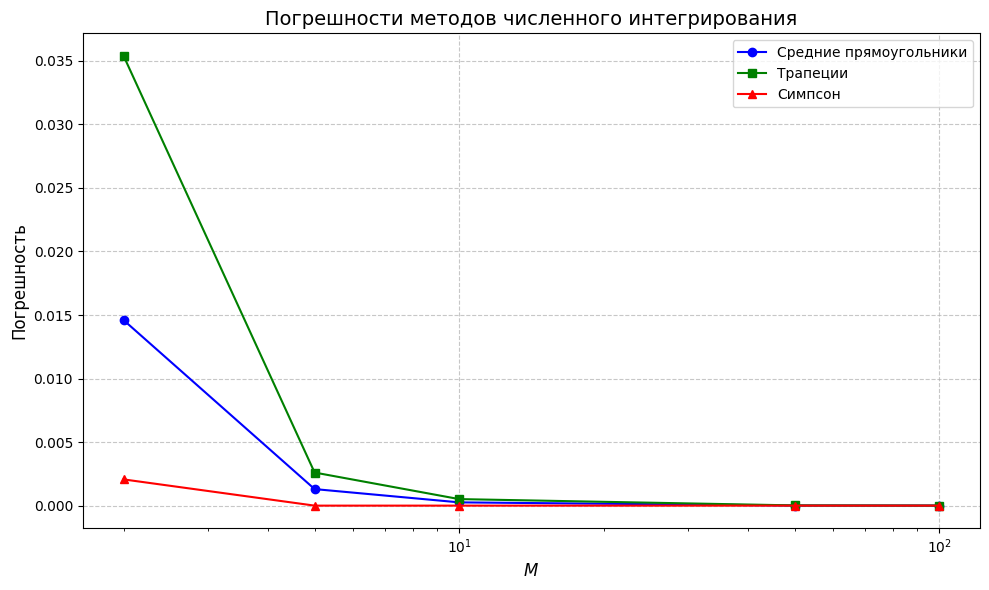

In [49]:
import matplotlib.pyplot as plt

# Построение графиков
plt.figure(figsize=(10, 6))  # Размер графика

plt.plot(M, avg_rec_me, marker='o', label='Средние прямоугольники', color='blue')
plt.plot(M, trapeze_me, marker='s', label='Трапеции', color='green')
plt.plot(M, simpson_me, marker='^', label='Симпсон', color='red')

plt.title("Погрешности методов численного интегрирования", fontsize=14)
plt.xlabel("$M$", fontsize=12)
plt.ylabel("Погрешность", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Сетка
plt.legend()  # Легенда с названиями графиков
plt.xscale('log')  # Логарифмическая шкала по X для лучшей видимости (опционально)

# Отображение графика
plt.tight_layout()
plt.show()

# Вывод
Анализируя значения погрешностей, представленные в таблице в первой части, а также на графике выше, можно сделать вывод, что метод Симпсона обладает наибольшим порядком сходимости среди рассмотренных методов. Из графика также следует, что метод трапеций демонстрирует наименьший порядок сходимости. Также следует отметить, что квадратурная формула Гаусса позволяет достичь высокой точности при меньшем количестве узлов по сравнению с остальными методами.